In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math

## 1. Summary statistics of all the defects

In [2]:
df = pd.read_csv('defect_3500.csv')
df.describe()

df.loc[:2449].describe()

,index,defWidth,defHeight,defPosx,defPosy,defAng,defAngR
count,2450.000000,2450.000000,2.450000e+03,2450.000000,2450.000000,2450.000000,2450.000000
mean,1225.500000,0.026113,1.000000e-03,-0.000320,0.030388,1.270854,0.022181
std,707.398403,0.018352,6.484853e-17,0.022207,0.010287,45.282482,0.790328
min,1.000000,0.000019,1.000000e-03,-0.039965,0.010064,-89.977098,-1.570397
25%,613.250000,0.011295,1.000000e-03,-0.019785,0.022394,-31.603092,-0.551578
50%,1225.500000,0.022550,1.000000e-03,-0.000547,0.030307,0.439034,0.007663
75%,1837.750000,0.037277,1.000000e-03,0.018201,0.038533,34.079630,0.594802
max,2450.000000,0.079769,1.000000e-03,0.039946,0.049956,89.887496,1.568833


In [3]:
df.loc[2450:].describe()

,index,defWidth,defHeight,defPosx,defPosy,defAng,defAngR
count,1050.000000,1050.000000,1.050000e+03,1050.000000,1050.000000,1050.000000,1050.000000
mean,2975.500000,0.026286,1.000000e-03,-0.000278,0.030139,1.336749,0.023331
std,303.253195,0.018588,4.555819e-18,0.022042,0.010129,45.585897,0.795624
min,2451.000000,0.000008,1.000000e-03,-0.039937,0.010064,-89.962484,-1.570142
25%,2713.250000,0.010588,1.000000e-03,-0.018673,0.022113,-31.528559,-0.550277
50%,2975.500000,0.023033,1.000000e-03,0.000420,0.029838,0.454046,0.007925
75%,3237.750000,0.037498,1.000000e-03,0.017929,0.038384,33.950915,0.592555
max,3500.000000,0.079220,1.000000e-03,0.039946,0.049956,89.403917,1.560393


### 3D MODEL

In [4]:
# df = pd.read_csv('2D_model_prediction_results.csv')
df2 = pd.read_csv('Model_prediction_evaluation/3D_model_prediction_results_final.csv')

df_summary2 = df2.describe().drop(columns=['index','defWidth','defHeight','defPosx','defPosy','defAng','defAngR', 'MSE_modified_das', 'MSE_modified_defect_DAS'])


df_summary2

,MSE,MSE_modified,MSE_modified_defect
count,1050.000000,1050.000000,1050.000000
mean,0.011468,0.003418,0.072265
std,0.016320,0.004688,0.081386
min,0.000027,0.000004,0.000149
25%,0.000249,0.000095,0.002460
50%,0.002202,0.000682,0.039121
75%,0.018101,0.005720,0.126568
max,0.085815,0.023146,0.358752


In [52]:
# val mse in cross validation
print(f'{(0.013/0.01295-1)*100}%')

# Mean MSE

print(f'{(0.011468/0.011384-1)*100}%')

0.38610038610038533%
0.7378777231201727%


In [57]:
0.011468 * (1 - 0.738/100)

0.01138336616

### 2D MODEL

In [24]:
# df = pd.read_csv('2D_model_prediction_results.csv')
df = pd.read_csv('Model_prediction_evaluation/2D_model_prediction_results_final.csv')
df['3d_MSE'] = df2.MSE

df_summary = df.describe().drop(columns=['index','defWidth','defHeight','defPosx','defPosy','defAng','defAngR'])
df_summary

# print(df_summary.to_latex())

,MSE,MSE_modified,MSE_modified_das,MSE_modified_defect,MSE_modified_defect_DAS,3d_MSE
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,0.011384,0.003418,0.068311,0.070485,0.140175,0.011468
std,0.016591,0.004776,0.004339,0.082426,0.027503,0.016320
min,0.000008,0.000001,0.061205,0.000070,0.093414,0.000027
25%,0.000069,0.000037,0.065324,0.000936,0.117397,0.000249
50%,0.000799,0.000283,0.067107,0.021028,0.138229,0.002202
75%,0.019240,0.005967,0.070113,0.130453,0.158361,0.018101
max,0.149570,0.036712,0.091812,0.353811,0.249405,0.085815


In [14]:
df[df.MSE > df_summary.MSE['75%']*3]

,index,defWidth,defHeight,defPosx,defPosy,defAng,defAngR,timestamp,MSE,MSE_modified,MSE_modified_das,MSE_modified_defect,MSE_modified_defect_DAS,3d_MSE
12,2463.0,0.070319,0.001,0.008914,0.028351,-24.606172,-0.429459,01-Feb-2023 07:00:25,0.059783,0.017492,0.074548,0.052960,0.104370,0.068459
16,2467.0,0.067784,0.001,0.002202,0.032700,-2.884768,-0.050349,01-Feb-2023 07:05:06,0.067131,0.018122,0.070658,0.229719,0.172835,0.043221
367,2818.0,0.067721,0.001,-0.003627,0.040243,8.644386,0.150873,01-Feb-2023 19:32:39,0.149570,0.036712,0.071222,0.137814,0.137160,0.023375
436,2887.0,0.061966,0.001,-0.022297,0.034628,28.992858,0.506021,01-Feb-2023 20:50:01,0.059676,0.016093,0.069998,0.058758,0.100142,0.000646
459,2910.0,0.076217,0.001,0.000042,0.019483,19.039706,0.332306,01-Feb-2023 21:20:04,0.063336,0.018181,0.078527,0.056589,0.111973,0.002037
511,2962.0,0.045747,0.001,-0.033188,0.023717,35.019437,0.611204,01-Feb-2023 22:24:40,0.060026,0.015919,0.067935,0.083298,0.106237,0.000912
541,2992.0,0.052129,0.001,0.006215,0.029692,-50.995320,-0.890036,01-Feb-2023 23:01:37,0.065431,0.016489,0.071416,0.069754,0.100872,0.007692
561,3012.0,0.077690,0.001,0.000564,0.033302,-3.729095,-0.065085,02-Feb-2023 00:59:39,0.059624,0.017449,0.070119,0.153208,0.138071,0.000646
575,3026.0,0.054258,0.001,-0.021651,0.029792,55.957655,0.976645,02-Feb-2023 01:20:53,0.060239,0.015063,0.069434,0.061482,0.100456,0.067760
746,3197.0,0.068120,0.001,-0.016805,0.021813,4.503829,0.078607,02-Feb-2023 04:54:33,0.071832,0.018912,0.069703,0.174345,0.135701,0.065266


In [41]:
df_summary.loc['mean']

MSE                        0.011384
MSE_modified               0.003418
MSE_modified_das           0.068311
MSE_modified_defect        0.916891
MSE_modified_defect_DAS    1.482955
Name: mean, dtype: float64

In [42]:
df_summary.MSE

count    1050.000000
mean        0.011384
std         0.016591
min         0.000008
25%         0.000069
50%         0.000799
75%         0.019240
max         0.149570
Name: MSE, dtype: float64

In [43]:
df[round(df.MSE, 6) == round(df_summary.MSE['25%'], 6)]
# df[round(df.MSE_modified, 6) == round(df_summary.MSE_modified['25%'], 6)]

,index,defWidth,defHeight,defPosx,defPosy,defAng,defAngR,timestamp,MSE,MSE_modified,MSE_modified_das,MSE_modified_defect,MSE_modified_defect_DAS
90,2541.0,0.041287,0.001,-0.000208,0.035605,29.183444,0.509347,01-Feb-2023 12:32:55,0.000069,0.000044,0.071769,0.911180,1.547970
124,2575.0,0.016307,0.001,0.038565,0.032162,84.075353,1.467392,01-Feb-2023 13:11:55,0.000069,0.000044,0.067110,0.716817,1.299905
618,3069.0,0.006750,0.001,0.035328,0.042322,12.421696,0.216800,02-Feb-2023 02:21:22,0.000069,0.000056,0.067130,0.756705,1.467606
632,3083.0,0.003701,0.001,0.024502,0.012622,-38.855388,-0.678154,02-Feb-2023 02:37:48,0.000069,0.000028,0.064093,0.831331,1.433752


In [44]:
df[round(df.MSE, 4) == round(df_summary.MSE['50%'], 4)]
# df[round(df.MSE_modified, 5) == round(df_summary.MSE_modified['50%'], 4)]

,index,defWidth,defHeight,defPosx,defPosy,defAng,defAngR,timestamp,MSE,MSE_modified,MSE_modified_das,MSE_modified_defect,MSE_modified_defect_DAS
484,2935.0,0.057102,0.001,0.018438,0.032483,-24.856294,-0.433824,01-Feb-2023 21:53:57,0.000788,0.000308,0.069553,0.937003,1.575898
560,3011.0,0.034555,0.001,0.016721,0.028940,-76.386570,-1.333197,02-Feb-2023 00:58:02,0.000811,0.000324,0.065045,0.873231,1.428138
640,3091.0,0.054884,0.001,0.031652,0.034973,-36.315684,-0.633828,02-Feb-2023 02:46:56,0.000778,0.000255,0.069374,0.932338,1.517282


In [18]:
df[round(df.MSE, 4) == round(df_summary.MSE['75%'], 4)]
# df[round(df.MSE_modified, 4) == round(df_summary.MSE_modified['75%'], 4)]

,index,defWidth,defHeight,defPosx,defPosy,defAng,defAngR,timestamp,MSE,MSE_modified,MSE_modified_das,MSE_modified_defect,MSE_modified_defect_DAS,3d_MSE
320,2771.0,0.016842,0.001,0.035613,0.030580,-84.785494,-1.479786,01-Feb-2023 17:09:12,0.019240,0.004861,0.066591,0.291667,0.207533,0.008626
703,3154.0,0.016537,0.001,-0.001847,0.013678,66.521434,1.161018,02-Feb-2023 04:04:22,0.019238,0.005271,0.062845,0.172490,0.149623,0.020904
988,3439.0,0.024674,0.001,0.029253,0.013097,-22.478128,-0.392317,02-Feb-2023 12:36:34,0.019243,0.006943,0.065625,0.119015,0.135092,0.021831


In [46]:
df[round(df.MSE, 6) == round(df_summary.MSE['max'], 6)]
# df[round(df.MSE_modified, 4) == round(df_summary.MSE_modified['max'], 4)]

,index,defWidth,defHeight,defPosx,defPosy,defAng,defAngR,timestamp,MSE,MSE_modified,MSE_modified_das,MSE_modified_defect,MSE_modified_defect_DAS
367,2818.0,0.067721,0.001,-0.003627,0.040243,8.644386,0.150873,01-Feb-2023 19:32:39,0.14957,0.036712,0.071222,1.005255,1.579965


In [47]:
df[round(df.MSE, 6) == round(df_summary.MSE['min'], 6)]
# df[round(df.MSE_modified, 7) == round(df_summary.MSE_modified['min'], 7)]

,index,defWidth,defHeight,defPosx,defPosy,defAng,defAngR,timestamp,MSE,MSE_modified,MSE_modified_das,MSE_modified_defect,MSE_modified_defect_DAS
562,3013.0,0.000228,0.001,-0.010908,0.046566,-72.647593,-1.26794,02-Feb-2023 01:01:45,0.000008,0.000002,0.06576,0.900805,1.736329


(-0.001, 0.02)

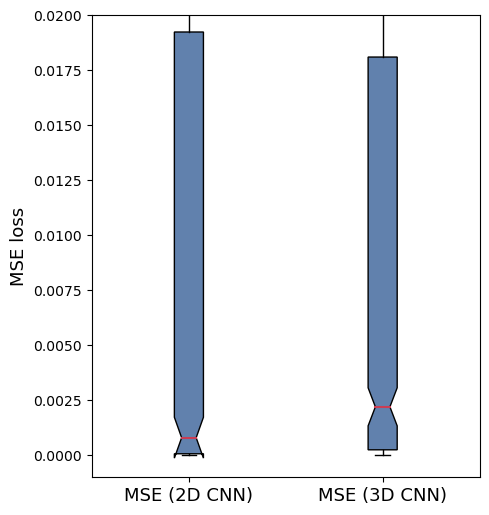

In [195]:
plt.subplots(figsize = (5, 6))
plt.boxplot([df.MSE, df['3d_MSE']],
                     notch = True,  # notch shape
                     vert = True,  # vertical box alignment
                     patch_artist = True,  # fill with color
                     labels=['MSE (2D CNN)', 'MSE (3D CNN)'], # will be used to label x-ticks
                     boxprops = dict(facecolor = "#6181ad"),
                     medianprops = dict(color = "#CA3C53", linewidth = 1.5))  

plt.ylabel('MSE loss', fontsize = 13)
plt.xticks(fontsize = 13)
plt.ylim(-0.001, 0.02)

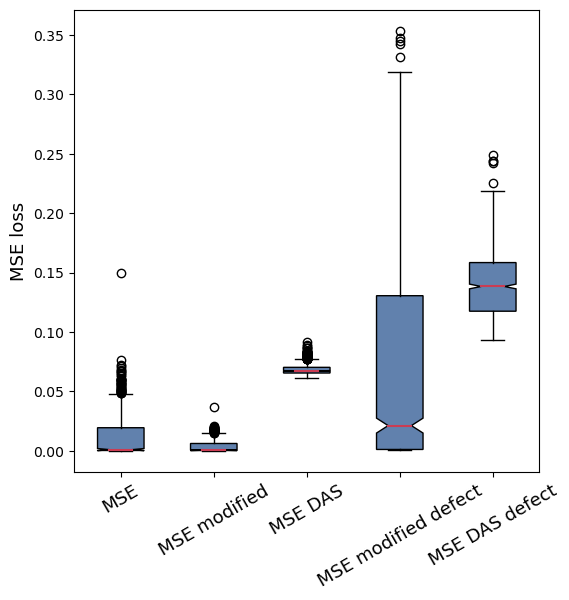

(array([1]), [Text(0, 0, '')])

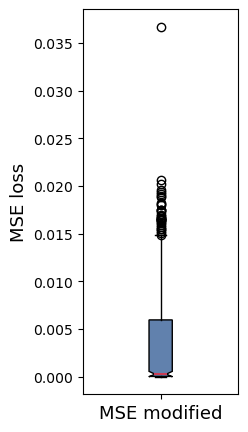

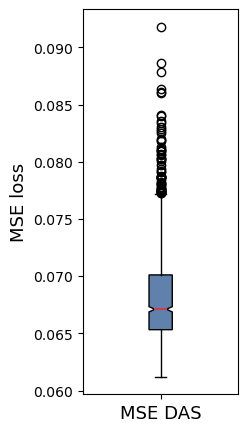

In [28]:
# Zoomed in view about the boxplot of 

# df2 = pd.read_csv('3D_model_prediction_results.csv')


plt.subplots(figsize = (6, 6))
plt.boxplot([df.MSE, df.MSE_modified, df.MSE_modified_das, df.MSE_modified_defect, df.MSE_modified_defect_DAS],
                     notch = True,  # notch shape
                     vert = True,  # vertical box alignment
                     patch_artist = True,  # fill with color
                     labels=['MSE', 'MSE modified', 'MSE DAS', 'MSE modified defect', 'MSE DAS defect'], # will be used to label x-ticks
                     boxprops = dict(facecolor = "#6181ad"),
                     medianprops = dict(color = "#CA3C53", linewidth = 1.5))  

plt.ylabel('MSE loss', fontsize = 13)
plt.xticks(fontsize = 13, rotation = 30)
plt.show()

plt.subplots(figsize = (2, 5))
plt.boxplot([df.MSE_modified],
                     notch = True,  # notch shape
                     vert = True,  # vertical box alignment
                     patch_artist = True,  # fill with color
                     labels=['MSE modified'], # will be used to label x-ticks
                     boxprops = dict(facecolor = "#6181ad"),
                     medianprops = dict(color = "#CA3C53", linewidth = 1.5))  

plt.ylabel('MSE loss', fontsize = 13)
plt.xticks(fontsize = 13)

plt.subplots(figsize = (2, 5))
plt.boxplot([df.MSE_modified_das],
                     notch = True,  # notch shape
                     vert = True,  # vertical box alignment
                     patch_artist = True,  # fill with color
                     labels=['MSE DAS'], # will be used to label x-ticks
                     boxprops = dict(facecolor = "#6181ad"),
                     medianprops = dict(color = "#CA3C53", linewidth = 1.5))  

plt.ylabel('MSE loss', fontsize = 13)
plt.xticks(fontsize = 13)


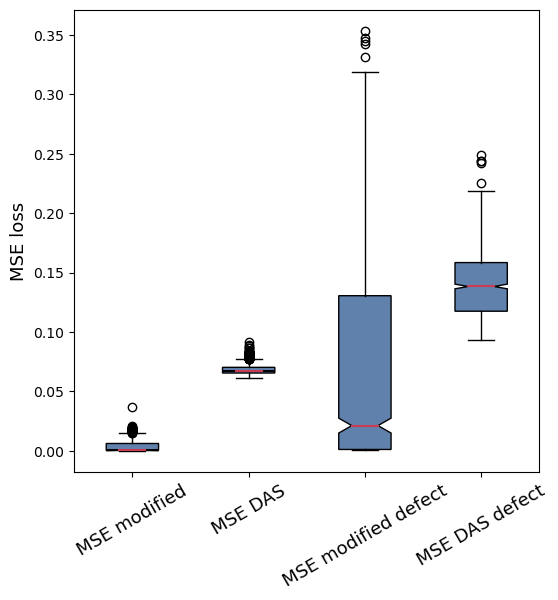

In [17]:
plt.subplots(figsize = (6, 6))
plt.boxplot([df.MSE_modified, df.MSE_modified_das, df.MSE_modified_defect, df.MSE_modified_defect_DAS],
                     notch = True,  # notch shape
                     vert = True,  # vertical box alignment
                     patch_artist = True,  # fill with color
                     labels=['MSE modified', 'MSE DAS', 'MSE modified defect', 'MSE DAS defect'], # will be used to label x-ticks
                     boxprops = dict(facecolor = "#6181ad"),
                     medianprops = dict(color = "#CA3C53", linewidth = 1.5))  

plt.ylabel('MSE loss', fontsize = 13)
plt.xticks(fontsize = 13, rotation = 30)
plt.show()

## Performance evaluation with noise (28/5/2023)

In [2]:
df = pd.read_csv(f'Model_prediction_evaluation_with_noise/noise_level_0.csv')
df.describe().drop(columns=['index','defWidth','defHeight','defPosx','defPosy','defAng','defAngR'])


,MSE_modified,MSE_modified_das,MSE_modified_defect,MSE_modified_defect_DAS
count,100.000000,100.000000,100.000000,100.000000
mean,0.003855,0.068248,0.075040,0.112637
std,0.002870,0.004475,0.037680,0.020730
min,0.000113,0.061371,0.017081,0.073641
25%,0.001762,0.064889,0.047685,0.097659
50%,0.003249,0.067285,0.067825,0.108317
75%,0.005154,0.070143,0.097351,0.126160
max,0.012244,0.084469,0.171706,0.177882


In [3]:
df_snr = pd.read_csv('SNR_ratio_summary.csv').drop(columns = ['Unnamed: 0'])
snr = df_snr.mean().to_numpy()

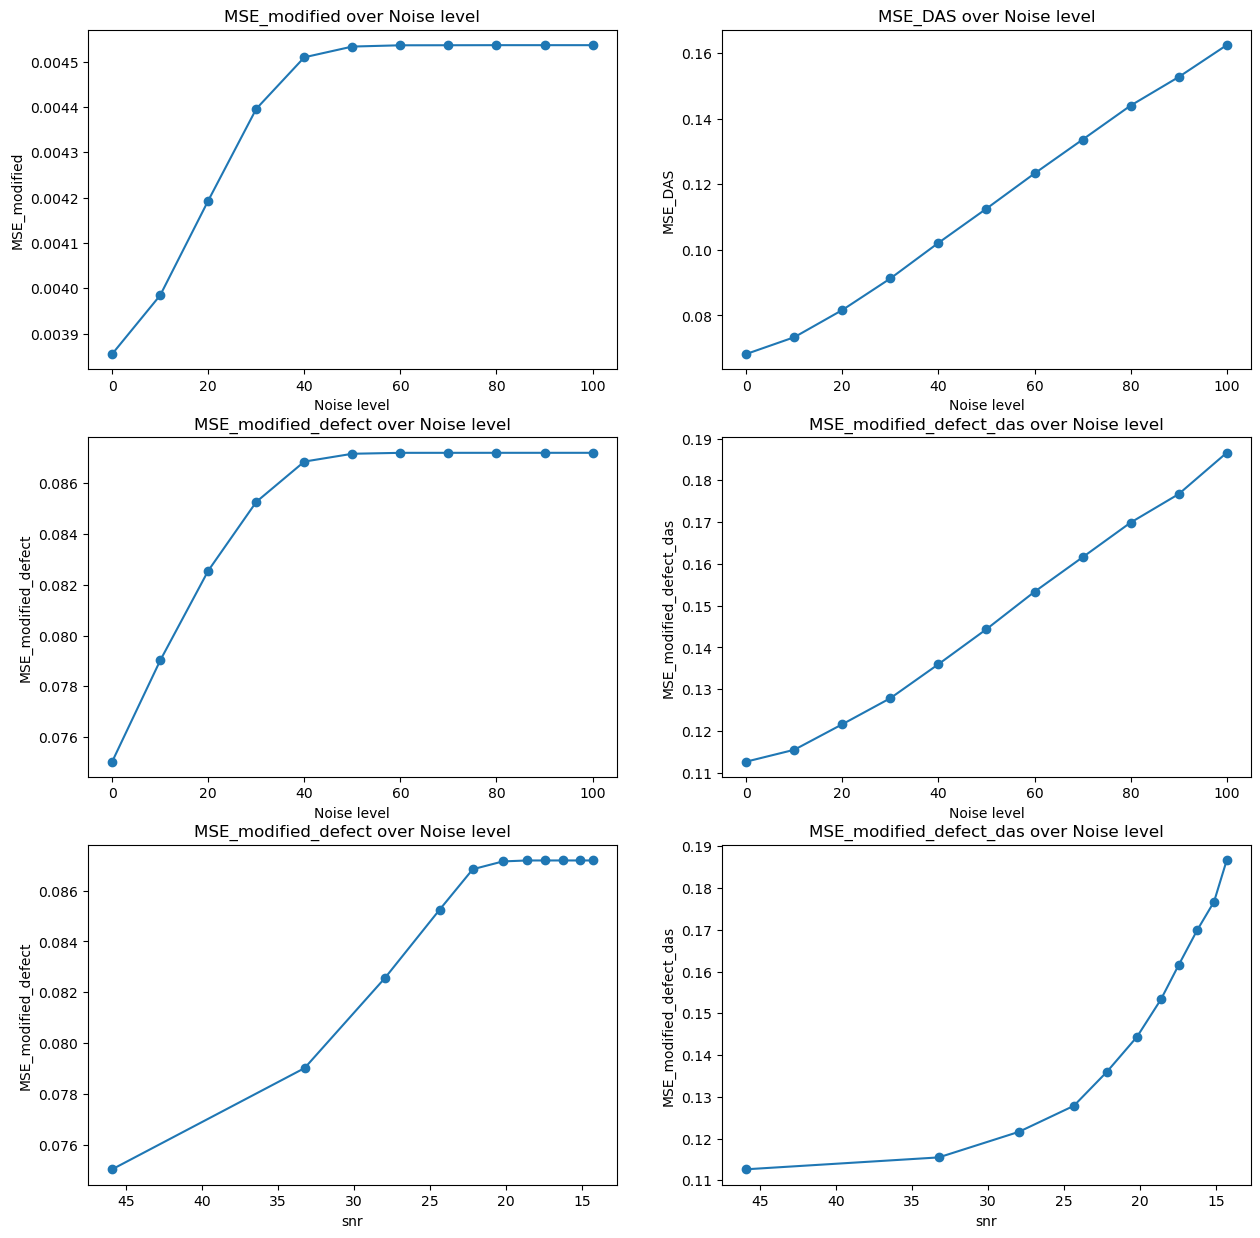

In [4]:
mse_mod_lst, mse_mod_das_lst, mse_mod_defect_lst, mse_mod_defect_das_lst = [], [], [], []

mse_mod_defect_std_lst, mse_mod_defect_das_std_lst = [], []

for noise_level in range(0, 110, 10):
    df = pd.read_csv(f'Model_prediction_evaluation_with_noise/noise_level_{noise_level}.csv')
    mse_mod_avg = df.describe().loc['mean'].MSE_modified
    mse_mod_das_avg = df.describe().loc['mean'].MSE_modified_das
    mse_mod_defect_avg = df.describe().loc['mean'].MSE_modified_defect
    mse_mod_defect_das_avg = df.describe().loc['mean'].MSE_modified_defect_DAS

    mse_mod_defect_std = df.describe().loc['std'].MSE_modified_defect
    mse_mod_defect_das_std = df.describe().loc['std'].MSE_modified_defect_DAS
    
    mse_mod_lst.append(mse_mod_avg)
    mse_mod_das_lst.append(mse_mod_das_avg)
    mse_mod_defect_lst.append(mse_mod_defect_avg)
    mse_mod_defect_das_lst.append(mse_mod_defect_das_avg)
    mse_mod_defect_std_lst.append(mse_mod_defect_std)
    mse_mod_defect_das_std_lst.append(mse_mod_defect_das_std)
    
noise_lst = np.arange(0, 110, 10)

fig, ax = plt.subplots(3, 2, figsize = [15, 15])
ax[0, 0].plot(noise_lst, mse_mod_lst, 'o-')
ax[0, 0].set_title('MSE_modified over Noise level')
ax[0, 0].set_xlabel('Noise level')
ax[0, 0].set_ylabel('MSE_modified')

ax[0, 1].plot(noise_lst, mse_mod_das_lst, 'o-')
ax[0, 1].set_title('MSE_DAS over Noise level')
ax[0, 1].set_xlabel('Noise level')
ax[0, 1].set_ylabel('MSE_DAS')

ax[1, 0].plot(noise_lst, mse_mod_defect_lst, 'o-')
ax[1, 0].set_title('MSE_modified_defect over Noise level')
ax[1, 0].set_xlabel('Noise level')
ax[1, 0].set_ylabel('MSE_modified_defect')

ax[1, 1].plot(noise_lst, mse_mod_defect_das_lst, 'o-')
ax[1, 1].set_title('MSE_modified_defect_das over Noise level')
ax[1, 1].set_xlabel('Noise level')
ax[1, 1].set_ylabel('MSE_modified_defect_das')

ax[2, 0].plot(snr, mse_mod_defect_lst, 'o-')
ax[2, 0].set_title('MSE_modified_defect over Noise level')
ax[2, 0].set_xlabel('snr')
ax[2, 0].set_ylabel('MSE_modified_defect')
ax[2, 0].invert_xaxis()

ax[2, 1].plot(snr, mse_mod_defect_das_lst, 'o-')
ax[2, 1].set_title('MSE_modified_defect_das over Noise level')
ax[2, 1].set_xlabel('snr')
ax[2, 1].set_ylabel('MSE_modified_defect_das')
ax[2, 1].invert_xaxis()

In [107]:

dic = {'noise_level':np.arange(0, 110, 10),
       'SNR': [round(i, 2) for i in snr],
       'MSE_modified_defect': mse_mod_defect_lst, 
       'MSE_modified_defect_DAS': mse_mod_defect_das_lst,}
df = pd.DataFrame(dic).set_index('noise_level')
# df = df.round(3)
print(df.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &    SNR &  MSE\_modified\_defect &  MSE\_modified\_defect\_DAS \\
noise\_level &        &                      &                          \\
\midrule
0           &  45.89 &             0.075040 &                 0.112637 \\
10          &  33.24 &             0.079019 &                 0.115481 \\
20          &  27.98 &             0.082549 &                 0.121595 \\
30          &  24.36 &             0.085254 &                 0.127838 \\
40          &  22.19 &             0.086838 &                 0.135973 \\
50          &  20.21 &             0.087146 &                 0.144364 \\
60          &  18.64 &             0.087183 &                 0.153317 \\
70          &  17.47 &             0.087183 &                 0.161577 \\
80          &  16.26 &             0.087184 &                 0.169890 \\
90          &  15.15 &             0.087184 &                 0.176706 \\
100         &  14.32 &             0.087184 &                 0.186604 \\
\

/var/folders/l5/2302s0j90898y2c73n3g1wmr0000gn/T/ipykernel_89678/1476261660.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


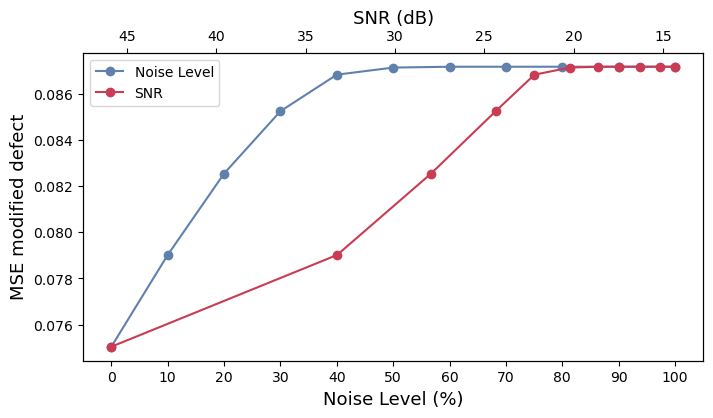

In [6]:
fig = plt.figure(figsize = (8, 4))
ax1 = fig.add_subplot(111)

error = np.array(mse_mod_defect_std_lst) * 1.96 / np.sqrt(100)
lns1 = ax1.plot(noise_lst, mse_mod_defect_lst, 'o-', c = "#6181ad", label = 'Noise Level')
# ax1.errorbar(x = noise_lst, y = mse_mod_defect_lst, yerr=error, xerr=None)
             
ax1.set_xlim(-5, 105)
ax1.set_xlabel("Noise Level (%)", fontsize = 13)
ax1.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax1.set_ylabel("MSE modified defect", fontsize = 13)


ax2 = ax1.twiny()
lns2 = ax2.plot(snr, mse_mod_defect_lst, 'o-', c = '#CA3C53', label = 'SNR')
# ax2.errorbar(x = snr, y = mse_mod_defect_lst, yerr=error, xerr=None)
ax2.set_xlabel("SNR (dB)", fontsize = 13)
ax2.invert_xaxis()

# added these two lines to plot legend
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

plt.show()

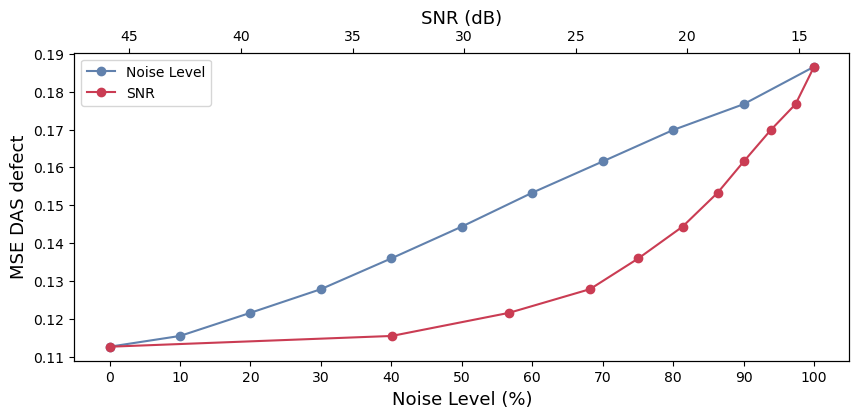

In [110]:
fig = plt.figure(figsize = (10, 4))
ax1 = fig.add_subplot(111)

lns1 = ax1.plot(noise_lst, mse_mod_defect_das_lst, 'o-', c = "#6181ad", label = 'Noise Level')

ax1.set_xlim(-5, 105)
ax1.set_xlabel("Noise Level (%)", fontsize = 13)
ax1.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax1.set_ylabel("MSE DAS defect", fontsize = 13)


ax2 = ax1.twiny()
lns2 = ax2.plot(snr, mse_mod_defect_das_lst, 'o-', c = '#CA3C53', label = 'SNR')
ax2.set_xlabel("SNR (dB)", fontsize = 13)
ax2.invert_xaxis()

# added these two lines to plot legend
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

plt.show()

## Performance evaluation with offset  (30/5/2023)

In [20]:
df = pd.read_csv(f'Model_prediction_evaluation_with_noise/noise_level_0.csv')

index_lst = [3501, 3506, 3508, 3515, 3516, 3518, 3525, 3544, 3560, 3561, 3569, 3582, 3591, 3593]

df_0_offset = pd.DataFrame()

for index in index_lst:
    df_select = df[df['index'] ==index]
    df_0_offset = pd.concat([df_0_offset, df_select])
    
df_0_offset = df_0_offset.drop(columns=['index','defWidth','defHeight','defPosx','defPosy','defAng','defAngR','timestamp'])

df = pd.read_csv(f'Model_prediction_evaluation_with_offset/offset_-2.csv')
df.describe()

,Unnamed: 0,MSE_modified,MSE_modified_das,MSE_modified_defect,MSE_modified_defect_DAS
count,14.0000,14.000000,14.000000,14.000000,14.000000
mean,6.5000,0.005161,0.074230,0.103492,0.134731
std,4.1833,0.002763,0.009400,0.070177,0.020500
min,0.0000,0.000016,0.060624,0.000220,0.104348
25%,3.2500,0.003434,0.067987,0.048392,0.123167
50%,6.5000,0.004565,0.070655,0.113487,0.129246
75%,9.7500,0.007777,0.083640,0.142983,0.147609
max,13.0000,0.009302,0.088872,0.222222,0.167581


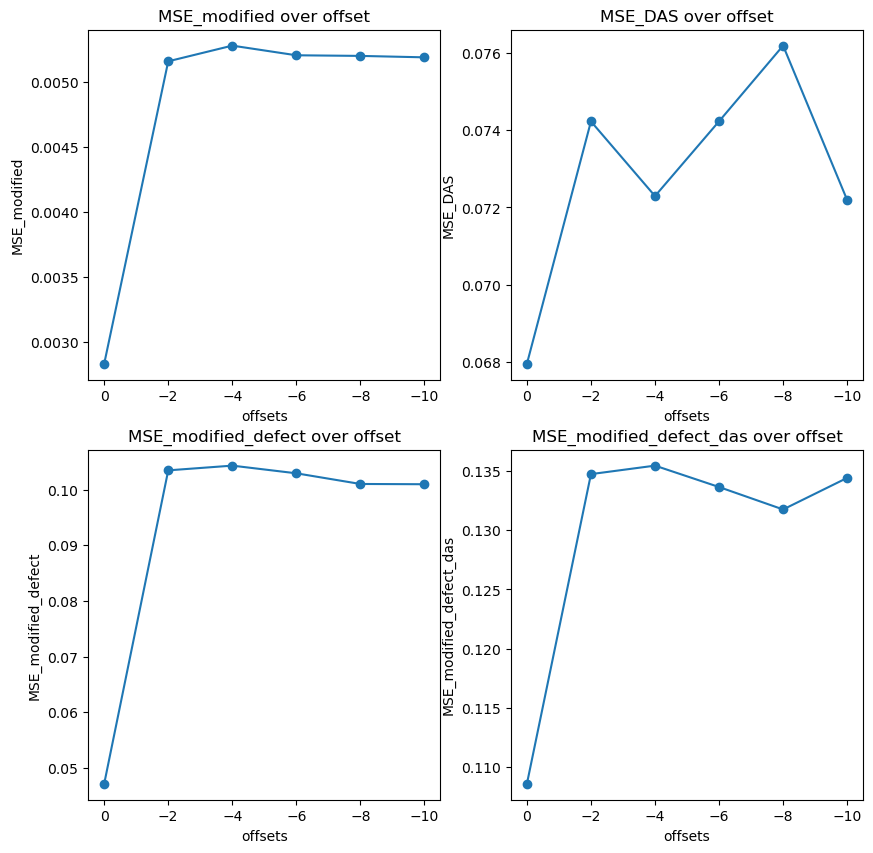

In [21]:
mse_mod_lst, mse_mod_das_lst, mse_mod_defect_lst, mse_mod_defect_das_lst = [], [], [], []

for offset in range(0, -12, -2):
    if offset == 0:
        mse_mod_avg = df_0_offset.describe().loc['mean'].MSE_modified
        mse_mod_das_avg = df_0_offset.describe().loc['mean'].MSE_modified_das
        mse_mod_defect_avg = df_0_offset.describe().loc['mean'].MSE_modified_defect
        mse_mod_defect_das_avg = df_0_offset.describe().loc['mean'].MSE_modified_defect_DAS
        
    else:
        df = pd.read_csv(f'Model_prediction_evaluation_with_offset/offset_{offset}.csv')
        mse_mod_avg = df.describe().loc['mean'].MSE_modified
        mse_mod_das_avg = df.describe().loc['mean'].MSE_modified_das
        mse_mod_defect_avg = df.describe().loc['mean'].MSE_modified_defect
        mse_mod_defect_das_avg = df.describe().loc['mean'].MSE_modified_defect_DAS

    mse_mod_lst.append(mse_mod_avg)
    mse_mod_das_lst.append(mse_mod_das_avg)
    mse_mod_defect_lst.append(mse_mod_defect_avg)
    mse_mod_defect_das_lst.append(mse_mod_defect_das_avg)
    
offsets = np.arange(0, -12, -2)

fig, ax = plt.subplots(2, 2, figsize = [10, 10])
ax[0, 0].plot(offsets, mse_mod_lst, 'o-')
ax[0, 0].set_title('MSE_modified over offset')
ax[0, 0].set_xlabel('offsets')
ax[0, 0].set_ylabel('MSE_modified')
ax[0, 0].invert_xaxis()

ax[0, 1].plot(offsets, mse_mod_das_lst, 'o-')
ax[0, 1].set_title('MSE_DAS over offset')
ax[0, 1].set_xlabel('offsets')
ax[0, 1].set_ylabel('MSE_DAS')
ax[0, 1].invert_xaxis()

ax[1, 0].plot(offsets, mse_mod_defect_lst, 'o-')
ax[1, 0].set_title('MSE_modified_defect over offset')
ax[1, 0].set_xlabel('offsets')
ax[1, 0].set_ylabel('MSE_modified_defect')
ax[1, 0].invert_xaxis()

ax[1, 1].plot(offsets, mse_mod_defect_das_lst, 'o-')
ax[1, 1].set_title('MSE_modified_defect_das over offset')
ax[1, 1].set_xlabel('offsets')
ax[1, 1].set_ylabel('MSE_modified_defect_das')
ax[1, 1].invert_xaxis()

,Offset (mm),MSE_modified_defect
0,0,0.047094
1,2,0.103492
2,4,0.104342
3,6,0.102961
4,8,0.101041
5,10,0.100995


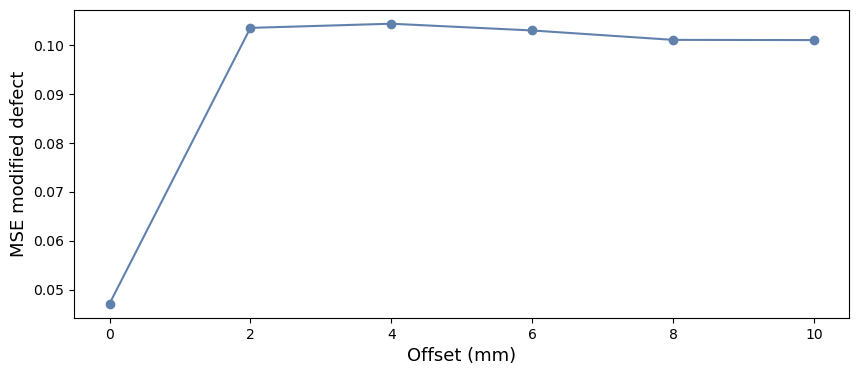

In [22]:
df_summary = pd.DataFrame({'Offset (mm)':[i for i in range(0, 12, 2)], 'MSE_modified_defect':mse_mod_defect_lst})
fig = plt.figure(figsize = (10, 4))
ax1 = fig.add_subplot(111)

lns1 = ax1.plot([i for i in range(0, 12, 2)], mse_mod_defect_lst, 'o-', c = "#6181ad")
ax1.set_ylabel("MSE modified defect", fontsize = 13)
ax1.set_xlabel("Offset (mm)", fontsize = 13)
df_summary